# ENSO Index Visualization
- The purpose of this notebook is to make a simple panel plot visualization of detrended Nino3.4 index for all relevant BGC members. This visualization is used in my poster for ICDC to show how the large ensemble works and how it is relevant to this project.

In [1]:
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

# Constants

In [136]:
ens = ['001', '002', '009', '010', '011', '012', '013', '014', '015', '016',
       '017', '018', '019', '020', '021', '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031', '032', '033', '034', '035', '101',
       '102', '103', '104', '105']

# Visualization Functions

In [163]:
def enso_fill(x, y, ax, ens):
    plot = plt.fill_between(x, y, where=y>0, facecolor='r', edgecolor='none')
    plot = plt.fill_between(x, y, where=y<0, facecolor='b', edgecolor='none')
    plt.grid('on')
    ax.set_ylim([-4,4])
    ax.text('1920-11', 3.2, ('S' + ens), bbox={'facecolor':'white'})
    return plot

# Load in CVDP

In [30]:
fileDir = '/glade/p/work/rbrady/cesmLE_CVDP/processed/'
ds = xr.open_dataset(fileDir + 'cvdp_detrended_BGC.nc')

# Generate Figure

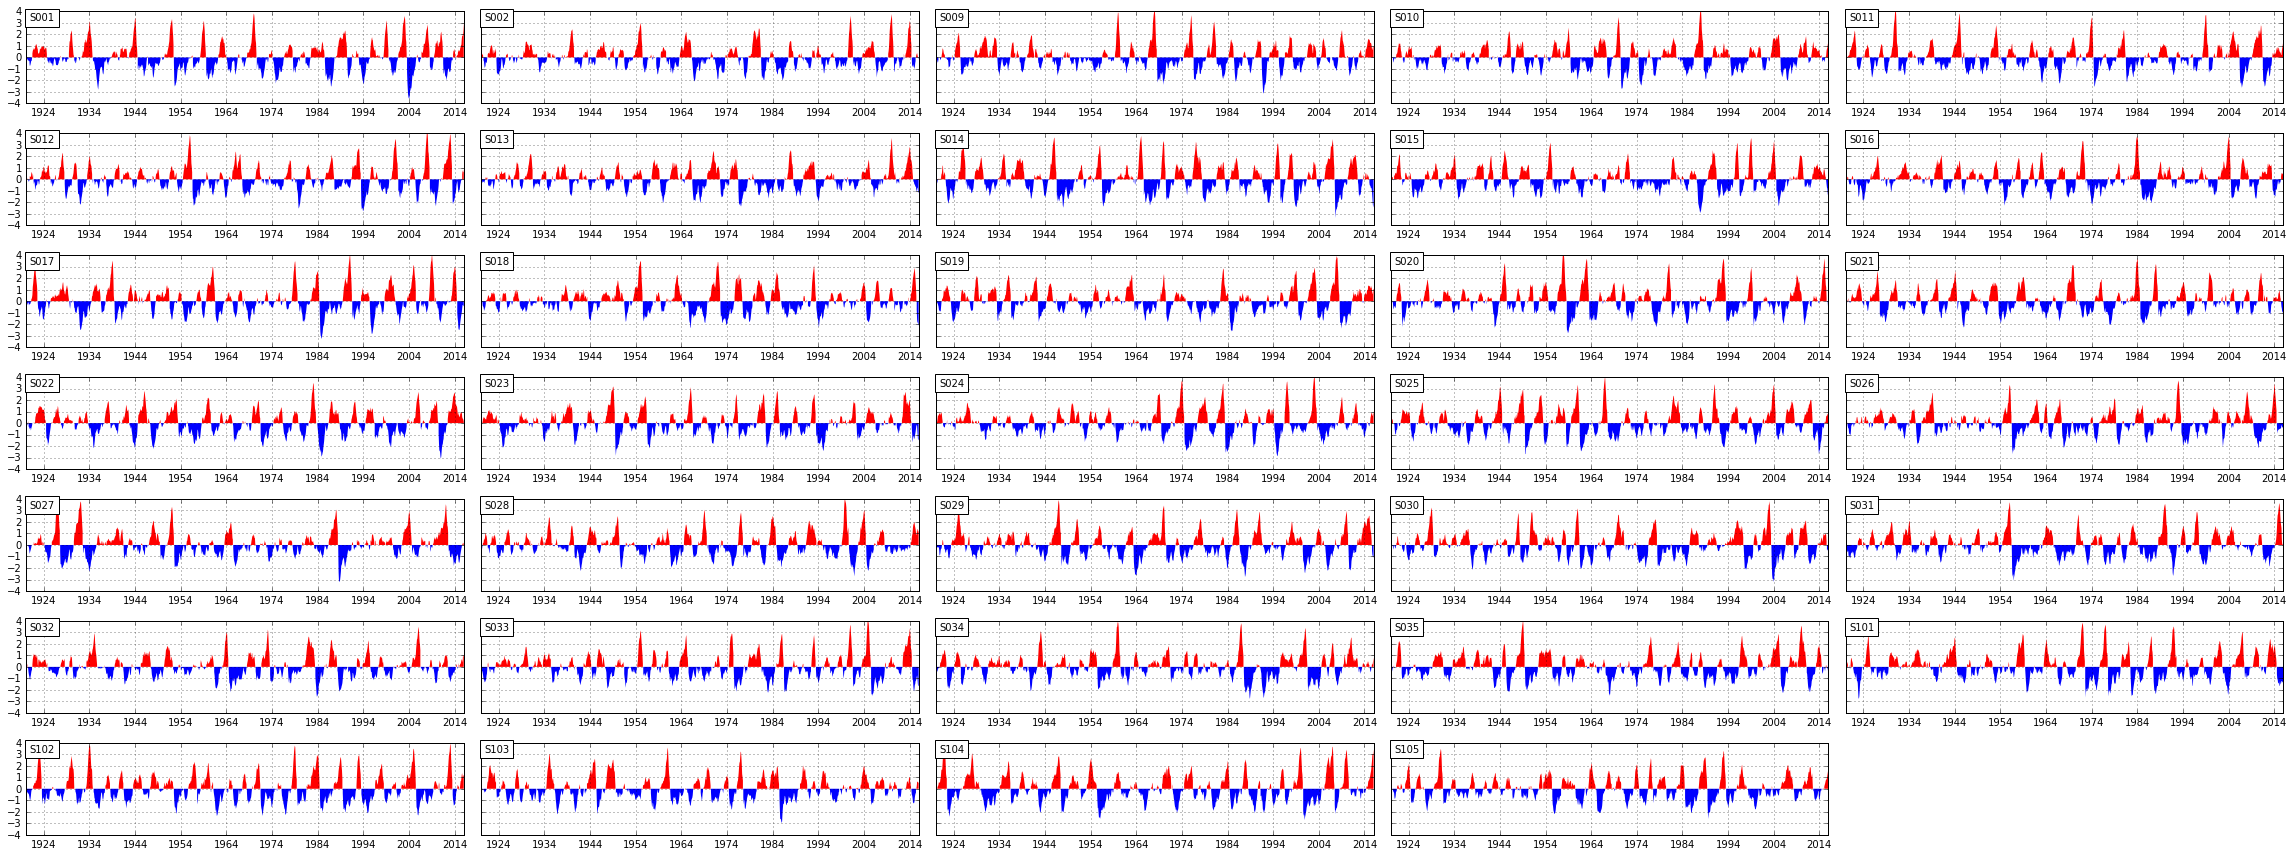

In [180]:
x = ds.time.values
fig = plt.figure(figsize=(32, 12))
for idx in np.arange(0, 35, 1):
    if idx == 34:
        pass
    else:
        ax = fig.add_subplot(7, 5, idx+1)
        y = ds['nino34'][idx].values
        enso_fill(x, y, ax, ens[idx])
        # Remove y axis for everything but first column
        if idx not in ([0, 5, 10, 15, 20, 25, 30]):
            ax.set_yticklabels('')    
fig.tight_layout()
#plt.savefig('test.eps', format='eps', bbox_inches='tight', pad_inches=1, dpi=1000)